Libraries required: gym, numpy, matplotlib

In [1]:
!pip install gym

In [2]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import random
import time

In [4]:
grid = np.zeros((3,3)) #this is how you define a 3x3 grid
print(grid)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


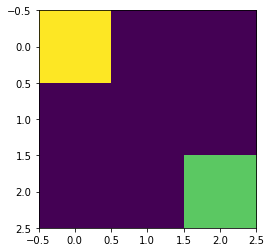

In [5]:
pos1 = [0,0] #start position of our agent
pos2 = [2,2] #goal position of our agent
grid[tuple(pos1)] = 0.8
grid[tuple(pos2)] = 0.6

plt.imshow(grid)

In [6]:
class GridEnvironment(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4) #up, down, right, left
        self.max_timesteps = 5
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [2,2]
        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        if action ==0: #down
            self.agent_pos[0] +=1  #[0,1]->[1,1]
        if action ==1: #up
            self.agent_pos[0] -=1  #[1,1]->[0,1]
        if action ==2: #right
            self.agent_pos[1] +=1
        if action ==3: #left
            self.agent_pos[1] -=1    
        
        self.agent_pos = np.clip(self.agent_pos, 0, 2) #used to prevent agent from going out of the grid
        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 1
        
        self.timestep += 1
        done = True if self.timestep>= self.max_timesteps else False
        info = {}
        
        return observation, reward, done, info
    
    
    def render(self):
        plt.imshow(self.state)

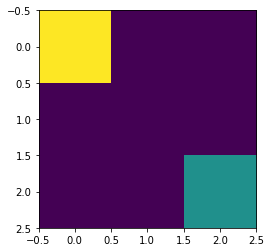

In [7]:
env = GridEnvironment()
obs = env.reset()
env.render()

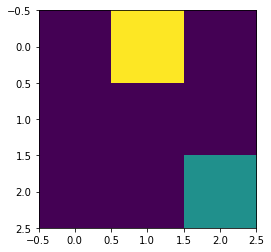

In [8]:
action = 2
observation, reward, done, info = env.step(action)
env.render()

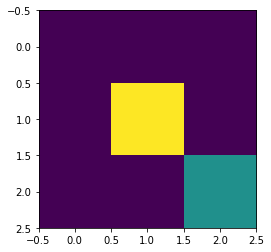

In [9]:
action = 0
observation, reward, done, info = env.step(action)
env.render()

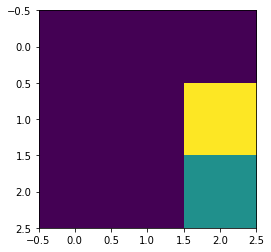

In [10]:
action = 2
observation, reward, done, info = env.step(action)
env.render()

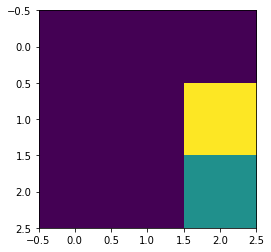

In [11]:
action = 2
observation, reward, done, info = env.step(action)
env.render()

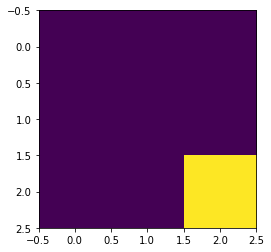

In [12]:
action = 0
observation, reward, done, info = env.step(action)
env.render()

In [13]:
print('Reward:', reward)

Reward: 1


In [12]:
class RandomAgent:
    '''Random Agent class that contains the contains the information of the agent that takes action randomly'''
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, observation):
        return np.random.choice(self.action_space.n)

Action 2
Reward 0
Done False
Action 0
Reward 0
Done False
Action 1
Reward 0
Done False
Action 1
Reward 0
Done False
Action 2
Reward 0
Done True


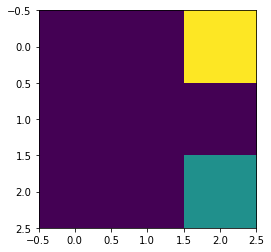

In [13]:
# Random Agent
# Create Environment
env = GridEnvironment()

# Create random agent
agent = RandomAgent(env)
obs = env.reset()
done = False

# Repeat steps of Agent till Episode ends
# 0 - Right, 1 - Left, 2 - Up, 3 - Down
while not done:
    action = agent.step(obs)
    obs, reward, done, _ = env.step(action)
    
    print('Action', action)
    print('Reward', reward)
    print('Done', done)
    env.render()
    time.sleep(1) 

0 -> Down <br>
1 -> Up <br>
2 -> Right <br>
3 -> Left